<a href="https://colab.research.google.com/github/le9na/Shears/blob/main/Bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Loading libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
# Loadingg data
data = pd.read_csv("Churn_Modelling.csv")

In [ ]:
# Checking if there are any null values before any work is done
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# Dropping unnecessary columns
unnecessary_columns = ["RowNumber","CustomerId","Surname"]
data.drop(unnecessary_columns, axis=1, inplace=True)

In [ ]:
# Show head to make sure of data correctness
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


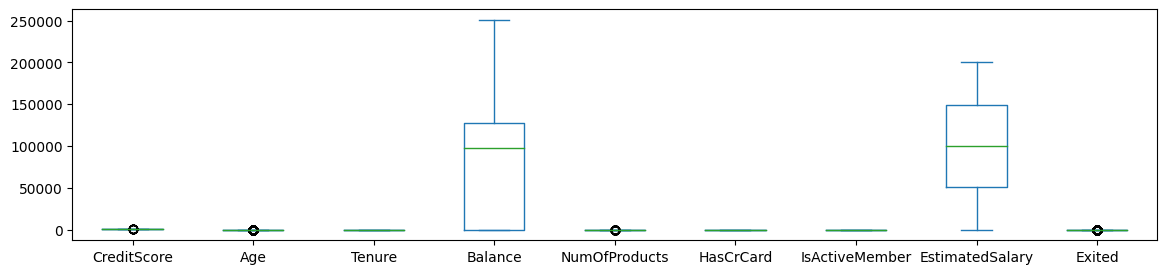

In [ ]:
#Plotting the data using box graph
data.plot(kind="box", figsize=(14,3))
plt.show()

In [ ]:
# Define a function to normalize data
def normalize_feature(variable, data1):
    data1[variable] = (data1[variable] - np.min(data1[variable]))/(np.max(data1[variable] - np.min(data1[variable])))

In [ ]:
# Make a copy of data, then use the normalizing function on the copy:
data_copy = data.copy()

for i in ['CreditScore','Age', 'Tenure', 'Balance','EstimatedSalary']:
    normalize_feature(i, data_copy)

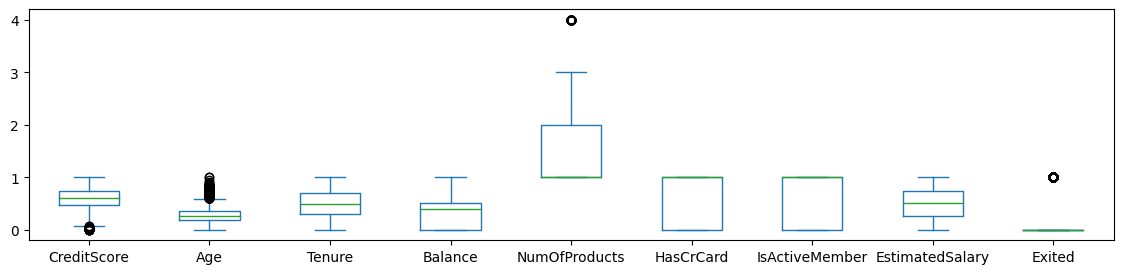

In [ ]:
# Plotting after normalization
data_copy.plot(kind="box", figsize=(14,3))
plt.show()

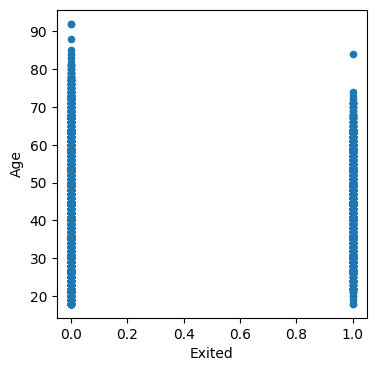

In [ ]:
# Studying features by plots

# 1. Age
data.plot(kind="scatter", x="Exited", y="Age", figsize=(4,4))
plt.show()

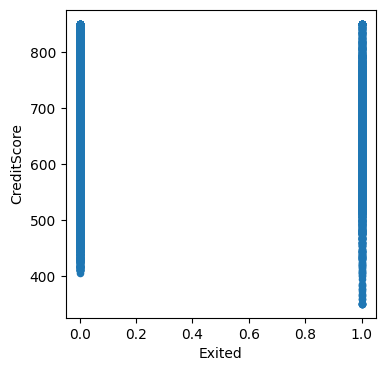

In [ ]:
# 2. Credit Score
data.plot(kind="scatter", x="Exited", y="CreditScore", figsize=(4,4))
plt.show()

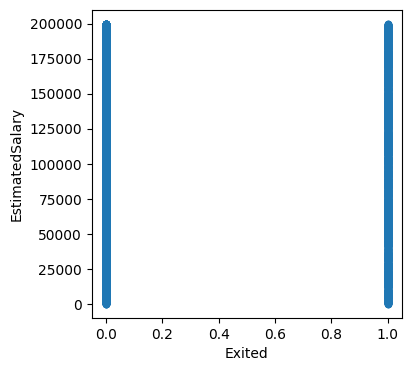

In [ ]:
# 3. Estimated Salary
data.plot(kind="scatter", x="Exited", y="EstimatedSalary", figsize=(4,4))
plt.show()

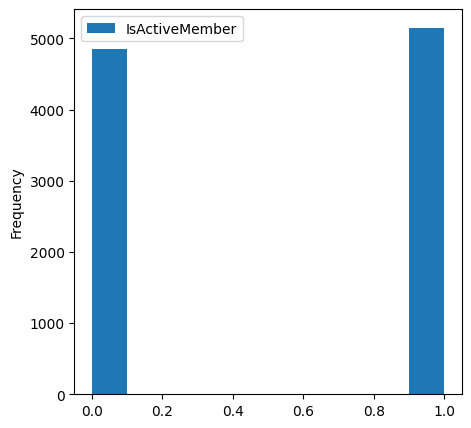

In [ ]:
# 3. Is Active Member
data.plot(kind="hist", x="Exited", y="IsActiveMember", figsize=(5,5))
plt.show()

In [ ]:
# Turn Geography and Gender into categorical data
df = data.copy()
df["Geography"] = df.Geography.astype("category")
df["Gender"] = df.Gender.astype("category")
df["Tenure"] = df.Tenure.astype("category")
df["NumOfProducts"] = df.NumOfProducts.astype("category")
df = pd.get_dummies(df,columns=["Geography","Gender", "Tenure", "NumOfProducts"])

In [ ]:
# Converting types of columns into category
for each in ["HasCrCard","IsActiveMember","Exited"]:
    df[each] = df[each].astype("category")

In [ ]:
# Check the results
df.head()

,CreditScore,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,...,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,619,42,0.00,1,1,101348.88,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,608,41,83807.86,0,1,112542.58,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,502,42,159660.80,1,0,113931.57,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,699,39,0.00,0,0,93826.63,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,850,43,125510.82,1,1,79084.10,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CreditScore        10000 non-null  int64   
 1   Age                10000 non-null  int64   
 2   Balance            10000 non-null  float64 
 3   HasCrCard          10000 non-null  category
 4   IsActiveMember     10000 non-null  category
 5   EstimatedSalary    10000 non-null  float64 
 6   Exited             10000 non-null  category
 7   Geography_France   10000 non-null  uint8   
 8   Geography_Germany  10000 non-null  uint8   
 9   Geography_Spain    10000 non-null  uint8   
 10  Gender_Female      10000 non-null  uint8   
 11  Gender_Male        10000 non-null  uint8   
 12  Tenure_0           10000 non-null  uint8   
 13  Tenure_1           10000 non-null  uint8   
 14  Tenure_2           10000 non-null  uint8   
 15  Tenure_3           10000 non-null  uint8   
 16  Tenur

In [ ]:
# Creating the input x, this would execlude the Exited column:
x = df.drop("Exited", axis=1)

# Normalize input:
for i in ["CreditScore", "Age", "Balance", "EstimatedSalary"]:
    normalize_feature(i, x)

# Check head of the x_train:
x.head()

,CreditScore,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,...,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,0.538,0.324324,0.000000,1,1,0.506735,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0.516,0.310811,0.334031,0,1,0.562709,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
2,0.304,0.324324,0.636357,1,0,0.569654,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0.698,0.283784,0.000000,0,0,0.469120,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,1.000,0.337838,0.500246,1,1,0.395400,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Creating output values y, which includes only Exited column
y = df["Exited"]

In [ ]:
x.shape

(10000, 26)

In [ ]:
y.shape

(10000,)

In [ ]:
# Splitting data into training and testing data, test percentage is 20%,
# Y train values are the training output values (labels).
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
# Algorithm #1: Logistic Regression:
lr_model = LogisticRegression(random_state = 1)
lr_model.fit(X_train, y_train)
print("Accuracy with train data: ", lr_model.score(X_train,y_train))

Accuracy with train data:  0.84125


In [ ]:
# Test data for Logistic Regression
print("Accuracy with test data: ", lr_model.score(X_test, y_test))

Accuracy with test data:  0.8445


In [ ]:
# Algorithm 2: Support Vector Machine
svm_model = SVC(random_state = 1)
svm_model.fit(X_train, y_train)
print("SVM accuracy with train data :", svm_model.score(X_train,y_train))

SVM accuracy with train data : 0.84775


In [ ]:
print("SVM accuracy with test data :", svm_model.score(X_test, y_test))

SVM accuracy with test data : 0.8455


In [ ]:
# Algorithm 3: Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

print("DT accuracy with train data :", dt_model.score(X_train,y_train))

DT accuracy with train data : 1.0


In [ ]:
print("DT accuracy with test data :", dt_model.score(X_test, y_test))

DT accuracy with test data : 0.7795


In [ ]:
# Testing cross validation for the algorithms

# Cross validation with Logistic Regression
accuracies_lr = cross_val_score(estimator = lr_model, X = X_train, y = y_train, cv = 10)
print("accuracies :", accuracies_lr)
print("mean accuracy :", accuracies_lr.mean())

accuracies : [0.84125 0.84625 0.83125 0.8275  0.8475  0.84625 0.845   0.82125 0.8375
 0.84375]
mean accuracy : 0.8387500000000001


In [ ]:
# Cross validation with SVM
accuracies_svm = cross_val_score(estimator = svm_model, X = X_train, y = y_train, cv = 10)
print("accuracies :", accuracies_svm)
print("mean accuracy :", accuracies_svm.mean())

accuracies : [0.84375 0.83875 0.83625 0.83    0.84625 0.8475  0.84375 0.8375  0.8325
 0.84125]
mean accuracy : 0.8397500000000001


In [ ]:
# Cross validation with Decision Tree
accuracies_dt = cross_val_score(estimator = dt_model, X = X_train, y = y_train, cv = 10)
print("accuracies :", accuracies_dt)
print("mean accuracy :", accuracies_dt.mean())

accuracies : [0.79625 0.76125 0.79375 0.80375 0.81    0.8075  0.78375 0.77875 0.77375
 0.77625]
mean accuracy : 0.7885000000000001
